## Truncated SVD

In the code below, we will look at implementing data reduction techniques for the MNIST dataset. This dataset contains labels for each image, but we will only be approaching the dataset from an unsupervised manner and will not include the labels for the analysis. From TensorFlow, the MNIST dataset can be imported by running the following code:

In [588]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [589]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


The MNIST data is split into three parts:
55,000 data points of training data (mnist.train)
10,000 points of test data (mnist.test)
5,000 points of validation data (mnist.validation).
Each image is 28 pixels by 28 pixels. The images are flatten out into a vector of 28x28 = 784 numbers. Also, each entry in the tensor is a pixel intensity between 0 and 1, for a particular pixel in a particular image.

In [600]:
def process_data(n=25000):
    train = mnist.train.images[:n]
    test = mnist.test.images[:n]
    print('Original Training Shape:',train.shape)
    
    l = pd.DataFrame(mnist.train.labels)
    labels = l.idxmax(axis=1)
    print('Labels: ',labels.shape[0])
    
    #Reshape Data into 28x28 pixels
    train_r = train.reshape(train.shape[0],28,28)
    test_r = test.reshape(test.shape[0],28,28)
    
    print('Reformat to 28x28 Pixels Shape:',train_r.shape)
    return(train,test,train_r,test_r,labels)

train,test,train_r,test_r,labels = process_data()

Original Training Shape: (25000, 784)
Labels:  55000
Reformat to 28x28 Pixels Shape: (25000, 28, 28)


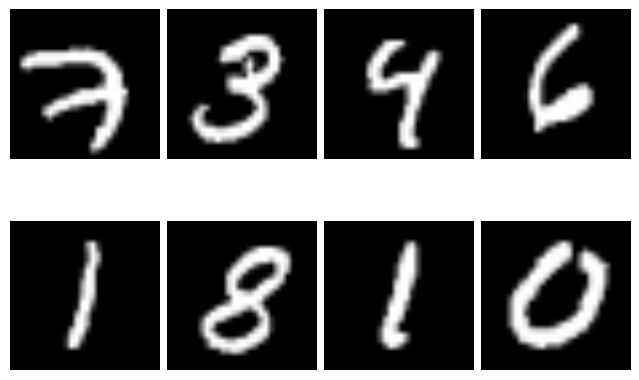

In [668]:
def plt_gallery(x,n_col=4,n_row=2):
    
    "Returns Photo Gallery of Images"
    
    fig = plt.figure(figsize=(8,5))
    fig.subplots_adjust(wspace=0.05)
    for img,i in enumerate(range(n_row*n_col)):
        plt.subplot(n_row,n_col,i+1)
        plt.imshow(x[img],cmap='gray',interpolation=None)
        plt.xticks(())
        plt.yticks(())

plt_gallery(train_r)

In [659]:
from sklearn.decomposition import TruncatedSVD

def do_truncatedSVD(data,threshold=0.50):
        
    print('Input Dimensions: {}'.format(data.shape[1]))
    
    #Setup Truncated SVD Loop
    n_components = 2
    ex_var = 0
    print('** Performing Truncated SVD... **')
    
    while ex_var < threshold:
        pc = TruncatedSVD(n_components=n_components)
        proj = pc.fit_transform(data)
        ex_var = np.sum(pc.explained_variance_ratio_)
        n_components += 1

    print('Total Number of Components: {}'.format(pc.n_components))
    print('Total Explained Variance: {}'.format(ex_var))
    print('Reduced Dimensions: {}'.format(proj.shape))
    
    return(pc)

pc = do_truncatedSVD(train)

Input Dimensions: 784
** Performing Truncated SVD... **
Total Number of Components: 11
Total Explained Variance: 0.5120358126638535
Reduced Dimensions: (25000, 11)


**Reconstruct Images**

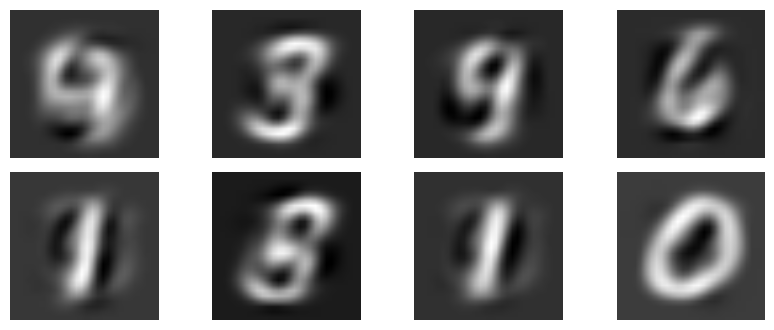

In [662]:
img_recon = []
for i in range(0,8):
    reconstruct = pc.inverse_transform(pc.transform(train[i])).reshape(28,28)
    img_recon.append(reconstruct)
    
n_col=2
n_row= np.ceil(len(img_recon) / n_col)
fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(hspace=.10)
for i in range(len(img_recon)):
    ax = fig.add_subplot(n_col,n_row,i+1)
    ax.imshow(img_recon[i],cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())